In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm

from sklearn.linear_model import LinearRegression

In [13]:
!ls csv_data/

batsman_perfromance_2008.csv       country_rank_2007.csv
batsman_perfromance_2009.csv       country_rank_2008.csv
batsman_perfromance_2010.csv       country_rank_2009.csv
batsman_perfromance_2011.csv       country_rank_2010.csv
batsman_perfromance_2012.csv       country_rank_2011.csv
batsman_perfromance_2013.csv       country_rank_2012.csv
batsman_perfromance_2014.csv       country_rank_2013.csv
batsman_perfromance_2015.csv       country_rank_2014.csv
batsman_perfromance_2016.csv       country_rank_2015.csv
batsman_perfromance_2017.csv       country_rank_2016.csv
batsman_perfromance_2018.csv       country_rank_2017.csv
batsman_perfromance_2019.csv       country_rank_2018.csv
bowler_perfromance_2008.csv        country_rank_2019.csv
bowler_perfromance_2009.csv        feature.csv
bowler_perfromance_2010.csv        feature_first_innings.csv
bowler_perfromance_2011.csv        first_innings_batsman.csv
bowler_perfromance_2012.csv        first_innings_feature_expanded.csv
bowler_perfromance_2

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

In [3]:
cutoff_start_year = '2009'
cutoff_start_date = datetime.strptime(cutoff_start_year+'-01-01','%Y-%m-%d')

In [4]:
match_summary_df = pd.read_csv('csv_data/match_list.csv',parse_dates=['date'],date_parser=custom_date_parser)
#country_rank_df = pd.read_csv('csv_data/')

In [5]:
recent_match_summary_df = match_summary_df[match_summary_df['date']>=cutoff_start_date]
recent_match_summary_df.shape

(1171, 11)

In [6]:
recent_match_summary_df

,match_id,date,location,first_innings,second_innings,winner,win_by,win_dif,toss_winner,player_of_match,train_data
206,366711,2009-01-07,Wellington,West Indies,New Zealand,New Zealand,wickets,7,New Zealand,DL Vettori,True
207,378753,2009-01-10,Mirpur,Zimbabwe,Bangladesh,Zimbabwe,runs,38,Bangladesh,E Chigumbura,True
208,378755,2009-01-14,Mirpur,Sri Lanka,Bangladesh,Bangladesh,wickets,5,Bangladesh,Shakib Al Hasan,True
209,351684,2009-01-16,Melbourne Cricket Ground,Australia,South Africa,South Africa,wickets,3,Australia,JA Morkel,True
210,351685,2009-01-18,Hobart,Australia,South Africa,Australia,runs,5,South Africa,SE Marsh,True
...,...,...,...,...,...,...,...,...,...,...,...
1372,1198240,2020-09-16,Manchester,England,Australia,Australia,wickets,3,England,GJ Maxwell,False
1373,1233461,2020-10-30,Rawalpindi Cricket Stadium,Pakistan,Zimbabwe,Pakistan,runs,26,Pakistan,BRM Taylor,False
1374,1233462,2020-11-01,Rawalpindi Cricket Stadium,Zimbabwe,Pakistan,Pakistan,wickets,6,Zimbabwe,Iftikhar Ahmed,False
1375,1223955,2020-11-27,Sydney Cricket Ground,Australia,India,Australia,runs,66,Australia,SPD Smith,False


In [7]:
match_id_list = list(recent_match_summary_df['match_id'])

# Feature Engineering functions

In [8]:
def get_trend(input_df,team_opponent,team_name,target_field):
    input_df.rename(columns={'winner':'winning_team'},inplace=True)

    selected_match_id_list = list(input_df['match_id'])
    match_detail_list = []
    for match_id in selected_match_id_list:
        if input_df[input_df['match_id']==match_id]['train_data'].values[0]==True:
            match_info = pd.read_csv('csv_data/train/'+str(match_id)+'.csv')
        else:
            match_info = pd.read_csv('csv_data/test/'+str(match_id)+'.csv')
        match_detail_list.append(match_info)
    match_detail_df = pd.concat(match_detail_list)
    match_detail_df.fillna('NA',inplace=True)

    match_detail_df = input_df.merge(match_detail_df,how='inner',on='match_id')


    sorted_df = match_detail_df[match_detail_df[team_opponent].isin(team_name)].groupby('match_id').agg({'date': 'min', target_field: 'sum'}).reset_index()
    sorted_df.sort_values('date',inplace=True)

    y=np.array(sorted_df[target_field])
    x=np.array(range(sorted_df.shape[0])).reshape(-1,1)+1
    linear_trend_model = LinearRegression()
    linear_trend_model.fit(x,y)
    next_instance_num = x.shape[0]+1
    
    base = linear_trend_model.intercept_
    trend = linear_trend_model.coef_[0]
    trend_predict = linear_trend_model.predict(np.array([next_instance_num]).reshape(-1,1))[0]
    mean = sorted_df[target_field].mean()
    
    return base,trend,trend_predict,mean


    
    

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
def get_trend_debug(input_df,team_opponent,team_name,target_field):
    input_df.rename(columns={'winner':'winning_team'},inplace=True)

    selected_match_id_list = list(input_df['match_id'])
    match_detail_list = []
    for match_id in selected_match_id_list:
        if input_df[input_df['match_id']==match_id]['train_data'].values[0]==True:
            match_info = pd.read_csv('csv_data/train/'+str(match_id)+'.csv')
        else:
            match_info = pd.read_csv('csv_data/test/'+str(match_id)+'.csv')
        match_detail_list.append(match_info)
    match_detail_df = pd.concat(match_detail_list)
    match_detail_df.fillna('NA',inplace=True)

    match_detail_df = input_df.merge(match_detail_df,how='inner',on='match_id')


    sorted_df = match_detail_df[match_detail_df[team_opponent].isin(team_name)].groupby('match_id').agg({'date': 'min', target_field: 'sum'}).reset_index()
    sorted_df.sort_values('date',inplace=True)

    y=np.array(sorted_df[target_field])
    x=np.array(range(sorted_df.shape[0])).reshape(-1,1)+1
    
    plt.scatter(x,y)
    
    linear_trend_model = LinearRegression()
    linear_trend_model.fit(x,y)
    next_instance_num = x.shape[0]+2
    
    
    new_x = np.array(range(x.shape[0]+2)).reshape(-1,1)
    y_preds = linear_trend_model.predict(new_x)
    plt.plot(y_preds)
    plt.scatter(new_x,y_preds,color='red')
        
    
    base = linear_trend_model.intercept_
    trend = linear_trend_model.coef_[0]
    trend_predict = linear_trend_model.predict(np.array([next_instance_num]).reshape(-1,1))[0]
    mean = sorted_df[target_field].mean()
    
    return base,trend,trend_predict,mean

In [31]:
def find_similar_team(search_country,country_rank_df):
    search_rank = country_rank_df[country_rank_df['country']==search_country]['rank'].values[0]
    if search_rank == 1:
        similar_rank_list = [2]
    elif search_rank == country_rank_df['rank'].max():
        similar_rank_list = [country_rank_df['rank'].max()-1]
    else:
        similar_rank_list = [search_rank-1,search_rank+1]
    return list(country_rank_df[country_rank_df['rank'].isin(similar_rank_list)]['country'])
    

# Jump to loop

In [16]:
selected_match_id = match_id_list[2]

In [17]:
match_date = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['date'].values[0]
team = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['first_innings'].values[0]
opponent = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['second_innings'].values[0]
location = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['location'].values[0]

match_year=pd.to_datetime(match_date).year
previous_year = match_year-1
country_rank_df = pd.read_csv('csv_data/country_rank_'+str(previous_year)+'.csv')

team_score = country_rank_df[country_rank_df['country']==team]['score'].values[0]
opponent_score = country_rank_df[country_rank_df['country']==opponent]['score'].values[0]

#selected_match_details = pd.read_csv('csv_data')
if recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['train_data'].values[0]==True:
    selected_match_details = pd.read_csv('csv_data/train/'+str(selected_match_id)+'.csv')
else:
    selected_match_details = pd.read_csv('csv_data/test/'+str(selected_match_id)+'.csv')
runs_scored=selected_match_details[selected_match_details['team']==team]['total'].sum()

#team batting strength
team_batsmaan_list = list(selected_match_details[selected_match_details['team']==team]['batsman'].unique())
batsman_rank_df = pd.read_csv('csv_data/batsman_perfromance_'+str(previous_year)+'.csv')
batsman_mean=batsman_rank_df[batsman_rank_df['batsman'].isin(team_batsmaan_list)]['batsman_score'].mean()
batsman_max=batsman_rank_df[batsman_rank_df['batsman'].isin(team_batsmaan_list)]['batsman_score'].max()

#opponent bawling strength
opponent_bowler_list = list(selected_match_details[selected_match_details['team']==team]['bowler'].unique())
bowler_rank_df = pd.read_csv('csv_data/bowler_perfromance_'+str(previous_year)+'.csv')
bowler_mean=bowler_rank_df[bowler_rank_df['bowler'].isin(opponent_bowler_list)]['bowler_score'].mean()
bowler_max=bowler_rank_df[bowler_rank_df['bowler'].isin(opponent_bowler_list)]['bowler_score'].max()

match_date,team,opponent,location,team_score,opponent_score,runs_scored,batsman_mean,batsman_max,bowler_mean,bowler_max

(numpy.datetime64('2009-01-14T00:00:00.000000000'),
 'Sri Lanka',
 'Bangladesh',
 'Mirpur',
 2.9025623238876253,
 0.7978609625668449,
 147,
 2.9960622611279457,
 5.015920318670156,
 2.8837921054702376,
 3.0347709617253065)

In [18]:
selected_match_details.columns

Index(['match_id', 'innings', 'team', 'opponent', 'ball', 'batsman',
       'non_striker', 'bowler', 'scored_runs', 'extras', 'total', 'extra_type',
       'wicket', 'wicket_type', 'player_out', 'fielders', 'winner'],
      dtype='object')

In [19]:
# get opponent History
last_5_opponent = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['second_innings']==opponent)
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)

last_5_location = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['location']==location)
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)

last_5_match = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)

if last_5_opponent.shape[0]==0:
    similar_opponent_list = find_similar_team(opponent,country_rank_df)
    last_5_opponent = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['second_innings'].isin(similar_opponent_list))
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)
if last_5_location.shape[0]==0:
    similar_team_list = find_similar_team(team,country_rank_df)
    #last_5_location = pd.DataFrame(last_5_match)
    last_5_location = match_summary_df[(match_summary_df['first_innings'].isin(similar_team_list)) 
                                   & (match_summary_df['location']==location)
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)
    location_team_list = similar_team_list
else:
    location_team_list = [team]
    
opponent_base,opponent_trend,opponent_trend_predict,opponent_mean = get_trend(last_5_opponent,'team',[team],'total')
location_base,location_trend,location_trend_predict,location_mean = get_trend(last_5_location,'team',location_team_list,'total')
current_base,current_trend,current_trend_predict,current_mean = get_trend(last_5_match,'team',[team],'total')




ValueError: No objects to concatenate

In [20]:
last_5_opponent = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['second_innings']==opponent)
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)
last_5_opponent

,match_id,date,location,first_innings,second_innings,winner,win_by,win_dif,toss_winner,player_of_match,train_data
176,335354,2008-06-30,Karachi,Sri Lanka,Bangladesh,Sri Lanka,runs,158,Sri Lanka,ST Jayasuriya,True
168,335348,2008-06-25,Lahore,Sri Lanka,Bangladesh,Sri Lanka,runs,131,Bangladesh,KC Sangakkara,True
86,293483,2007-07-25,Colombo,Sri Lanka,Bangladesh,Sri Lanka,runs,39,Bangladesh,J Mubarak,True
84,293481,2007-07-20,Colombo,Sri Lanka,Bangladesh,Sri Lanka,runs,70,Bangladesh,CRD Fernando,True


(165.99999999999997, 45.500000000000014, 439.0000000000001, 279.75)

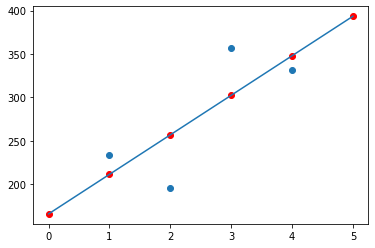

In [36]:
get_trend_debug(last_5_opponent,'team',[team],'total')

In [116]:
# last_5_match.rename(columns={'winner':'winning_team'},inplace=True)
# #last_5_match.sort_values(['date'],inplace=True)
# selected_match_id_list = list(last_5_match['match_id'])
# match_detail_list = []
# for match_id in selected_match_id_list:
#     if last_5_match[last_5_match['match_id']==match_id]['train_data'].values[0]==True:
#         match_info = pd.read_csv('csv_data/train/'+str(match_id)+'.csv')
#     else:
#         match_info = pd.read_csv('csv_data/test/'+str(match_id)+'.csv')
#     match_detail_list.append(match_info)
# match_detail_df = pd.concat(match_detail_list)
# match_detail_df.fillna('NA',inplace=True)

# match_detail_df = last_5_match.merge(match_detail_df,how='inner',on='match_id')

# #match_detail_df.sort_values('date',ascending=True,inplace=True)
# sorted_df = match_detail_df[match_detail_df['team']==team].groupby('match_id').agg({'date': 'min', 'total': 'sum'}).reset_index()
# sorted_df.sort_values('date',inplace=True)

# y=np.array(sorted_df['total'])
# x=np.array(range(sorted_df.shape[0])).reshape(-1,1)
# linear_trend_model = LinearRegression()
# linear_trend_model.fit(x,y)
# base = linear_trend_model.intercept_
# trend = linear_trend_model.coef_[0]
# mean = sorted_df['total'].mean()


In [165]:
# match_year=pd.to_datetime(match_date).year
# previous_year = match_year-1
# country_rank_df = pd.read_csv('csv_data/country_rank_'+str(previous_year)+'.csv')
# search_country = opponent
# search_rank = country_rank_df[country_rank_df['country']==search_country]['rank'].values[0]
# if search_rank == 1:
#     similar_rank_list = [2]
# elif search_rank == country_rank_df['rank'].max():
#     similar_rank_list = [country_rank_df['rank'].max()-1]
# else:
#     similar_rank_list = [search_rank-1,search_rank+1]
# list(country_rank_df[country_rank_df['rank'].isin(similar_rank_list)]['country'])
    
# #similar_country_list = 

['Sri Lanka', 'Zimbabwe']

# Loop

In [25]:
feature_data=[]
for selected_match_id in tqdm(match_id_list):
    
    noise = False
    match_date = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['date'].values[0]
    team = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['first_innings'].values[0]
    opponent = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['second_innings'].values[0]
    location = recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['location'].values[0]

    match_year=pd.to_datetime(match_date).year
    previous_year = match_year-1
    country_rank_df = pd.read_csv('csv_data/country_rank_'+str(previous_year)+'.csv')

    if country_rank_df[country_rank_df['country']==team].shape[0]==0\
    or country_rank_df[country_rank_df['country']==opponent]['score'].shape[0]==0:
        continue
    
    team_score = country_rank_df[country_rank_df['country']==team]['score'].values[0]
    opponent_score = country_rank_df[country_rank_df['country']==opponent]['score'].values[0]

    
    if recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['train_data'].values[0]==True:
        selected_match_details = pd.read_csv('csv_data/train/'+str(selected_match_id)+'.csv')
    else:
        selected_match_details = pd.read_csv('csv_data/test/'+str(selected_match_id)+'.csv')
        
        
    runs_scored=selected_match_details[selected_match_details['team']==team]['total'].sum()
    
    #team batting strength
    team_batsmaan_list = list(selected_match_details[selected_match_details['team']==team]['batsman'].unique())
    batsman_rank_df = pd.read_csv('csv_data/batsman_perfromance_'+str(previous_year)+'.csv')
    batsman_mean=batsman_rank_df[batsman_rank_df['batsman'].isin(team_batsmaan_list)]['batsman_score'].mean()
    batsman_max=batsman_rank_df[batsman_rank_df['batsman'].isin(team_batsmaan_list)]['batsman_score'].max()

    #opponent bawling strength
    opponent_bowler_list = list(selected_match_details[selected_match_details['team']==team]['bowler'].unique())
    bowler_rank_df = pd.read_csv('csv_data/bowler_perfromance_'+str(previous_year)+'.csv')
    bowler_mean=bowler_rank_df[bowler_rank_df['bowler'].isin(opponent_bowler_list)]['bowler_score'].mean()
    bowler_max=bowler_rank_df[bowler_rank_df['bowler'].isin(opponent_bowler_list)]['bowler_score'].max()


    
    
    last_5_opponent = match_summary_df[(match_summary_df['first_innings']==team) 
                                   & (match_summary_df['second_innings']==opponent)
                                   & (match_summary_df['date']<match_date)
                                  ].sort_values('date',ascending=False).head(5)

    last_5_location = match_summary_df[(match_summary_df['first_innings']==team) 
                                       & (match_summary_df['location']==location)
                                       & (match_summary_df['date']<match_date)
                                      ].sort_values('date',ascending=False).head(5)

    last_5_match = match_summary_df[(match_summary_df['first_innings']==team) 
                                       & (match_summary_df['date']<match_date)
                                      ].sort_values('date',ascending=False).head(5)

    if last_5_opponent.shape[0]==0:
        similar_opponent_list = find_similar_team(opponent,country_rank_df)
        last_5_opponent = match_summary_df[(match_summary_df['first_innings']==team) 
                                       & (match_summary_df['second_innings'].isin(similar_opponent_list))
                                       & (match_summary_df['date']<match_date)
                                      ].sort_values('date',ascending=False).head(5)
        noise = True
    if last_5_location.shape[0]==0:
        similar_team_list = find_similar_team(team,country_rank_df)
        last_5_location = match_summary_df[(match_summary_df['first_innings'].isin(similar_team_list)) 
                                       & (match_summary_df['location']==location)
                                       & (match_summary_df['date']<match_date)
                                      ].sort_values('date',ascending=False).head(5)
        location_team_list = similar_team_list
        noise = True
    else:
        location_team_list = [team]
        
    if last_5_opponent.shape[0]==0 or last_5_location.shape[0]==0:
        continue

    opponent_base,opponent_trend,opponent_trend_predict,opponent_mean = get_trend(last_5_opponent,'team',[team],'total')
    location_base,location_trend,location_trend_predict,location_mean = get_trend(last_5_location,'team',location_team_list,'total')
    current_base,current_trend,current_trend_predict,current_mean = get_trend(last_5_match,'team',[team],'total')

    feature_dict = {
        'match_id':selected_match_id,
        'match_date':match_date,
        'team':team,
        'opponent':opponent,
        'location':location,
        'team_score':team_score,
        'opponent_score':opponent_score,
        'opponent_base':opponent_base,
        'opponent_trend':opponent_trend,
        'opponent_trend_predict':opponent_trend_predict,
        'opponent_mean':opponent_mean,
        'location_base':location_base,
        'location_trend':location_trend,
        'location_trend_predict':location_trend_predict,
        'location_mean':location_mean,
        'current_base':current_base,
        'current_trend':current_trend,
        'current_trend_predict':current_trend_predict,
        'current_mean':current_mean,
        'batsman_mean':batsman_mean,
        'batsman_max':batsman_max,
        'bowler_mean':bowler_mean,
        'bowler_max':bowler_max,
        'is_train':recent_match_summary_df[recent_match_summary_df['match_id']==selected_match_id]['train_data'].values[0],
        'noise':noise,
        'runs_scored':runs_scored
             
    }
    
    feature_data.append(feature_dict)

feature_df = pd.DataFrame(feature_data)
feature_df.to_csv('csv_data/feature_first_innings.csv',index=False)


In [26]:
#feature_df.to_csv('csv_data/feature_first_innings.csv',index=False)

In [27]:
feature_df.shape

(832, 26)

In [28]:
feature_df[feature_df['is_train']==True].shape

(723, 26)